<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# Макаренко Алла КМ-83. Метод спряжених напрямків Пауелла.





## Зміст

* Зміст
* Постановка задачі
* Теоретичні відомості
  * Степенева функцiя
  * Метод спряжених напрямів Пауелла
* Реалізація методу
  * Імпорт бібліотек
  * Оголошення констант
  * Оголошення функцій
  * Виконання розрахунків та відображення результатів
* Висновки
* Список використаної літератури



## Постановка задачі



Дослідити збіжність метода спряжених напрямів Пауелла при мінімізації  степеневої функції в залежності від:
1.	Виду метода одновимірного пошуку (ДСК-Пауелла або Золотого перетину).
2.	Точності метода одновимірного пошуку.
3.	Значення параметру в алгоритмі Свена.


## Теоретичні відомості

### Cтепенева функція

$$ f(x_1, x_2) = (10(x_1 - x_2)^2 + (x_1 - 1)^2)^4) $$

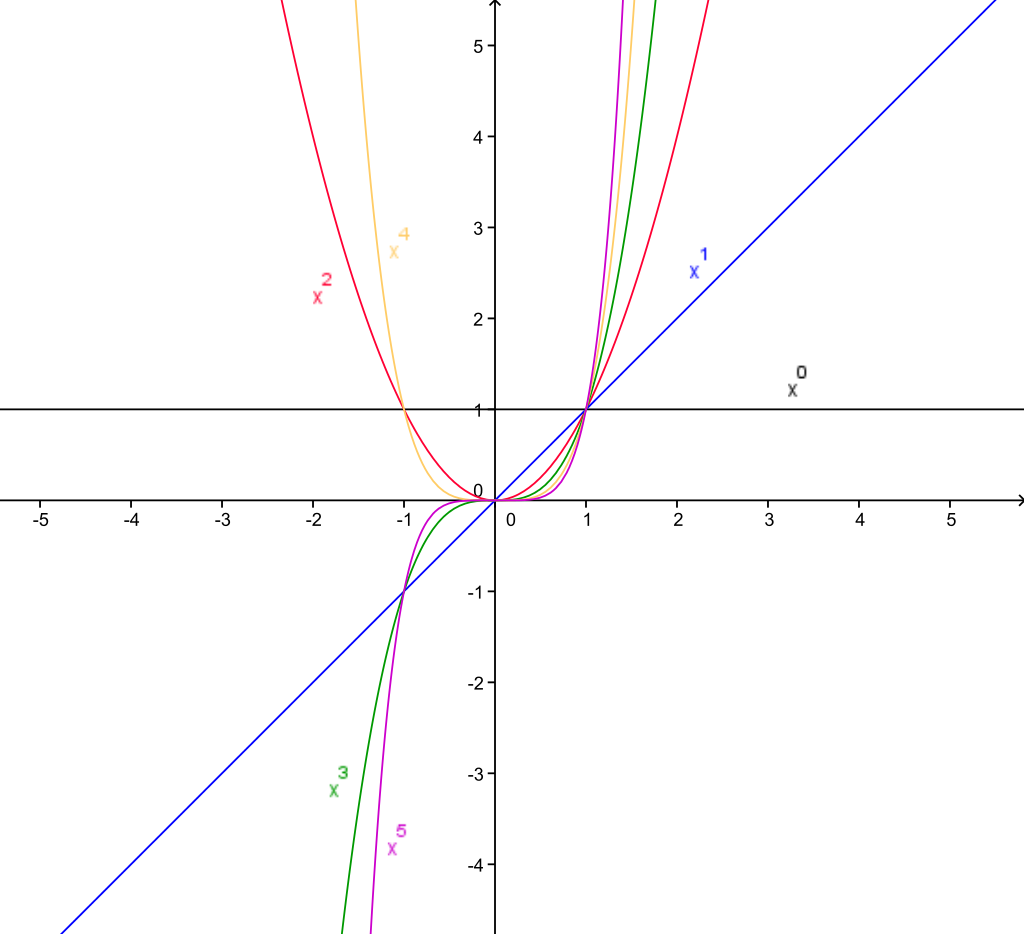

Степенева функція на прикладі парабол різних порядків.

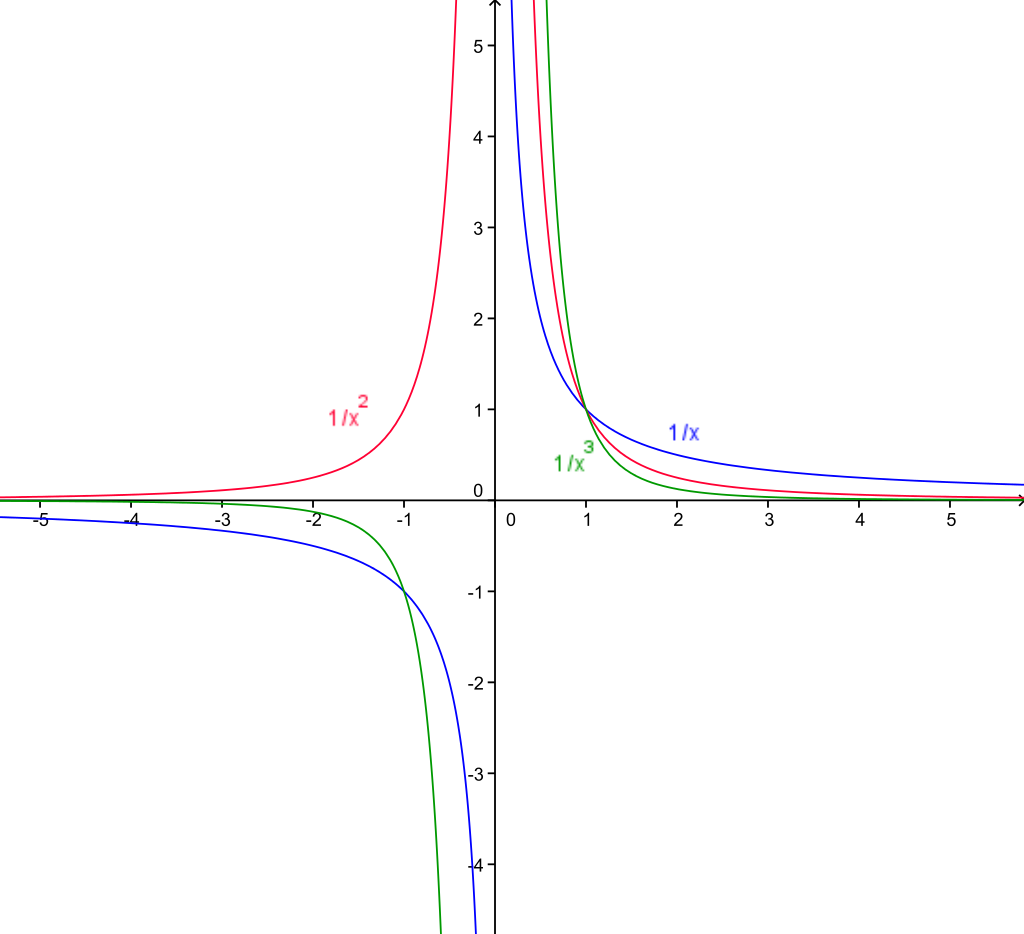

Степенева функція на прикладі гіпербол різних порядків.

### Метод спряжених напрямів Пауелла
У методі Пауелла мінімум квадратичної функції f (x) при H> 0 визначається шляхом проведення послідовних одновимірних пошуків, починаючи з вихідної точки x0 уздовж системи отриманих спряжених напрямків.
Метод заснований на теоретичних результатах і використовується для вирішення завдань з квадратичними цільовими функціями. В околі точки мінімуму будь-яку нелінійну функцію можна апроксимувати квадратичною функцією. Робота алгоритму при вирішенні завдань з квадратичними функціями дає уявлення про збіжність алгоритму, коли мінімізується функція загального вигляду.
Квадратична функція n незалежних змінних, що має мінімум (H> 0) може бути мінімізована за n кроків (або менше), якщо кроки робляться в спряжених напрямках.
Пошук мінімуму в просторі перетворених змінних здійснюється уздовж головних осей квадратичної функції. Для деякої матриці H завжди існує принаймні одна система з n взаємно спряжених напрямків, так як самі власні вектори H є такою системою.
У методах, що використовують похідні, система векторів спряжених напрямків може бути обчислена безпосередньо через величини похідних (матриця Гессе). Система спряжених напрямків в методі Пауелла для побудови  напрямків використовує наступну теорему:
Властивість паралельного підпростору:
Нехай f (x) - квадратична цільова функція. Якщо при початковій точці x (0) в напрямку S мінімум f (x) знаходиться в точці x (a), і якщо при початковій точці x (-1)  x (0) в тому ж напрямку S мінімум функції f (x) знаходиться в точці x (b), то при f (x (b)) <f (x (a)) напрямок (x (b) - x (a)) спряжений з S.

Алгоритм методу сполучених напрямків Пауелла.
1. Задається початкова точка x (0), і система напрямків S (1), ..., S (n) .
2. Складається система напрямків S (n), S (1), ..., S (n). Мінімізується f (x) при послідовному русі по (n + 1) напрямкам.
3. Визначається новий спряжений напрямок, використовуючи властивість паралельного підпростору (напрямок повного переміщення).
4. S (1) = S (2); S (2) = S (3); ...; S (n) = новому спряженому напрямку. Перейти до п.2.

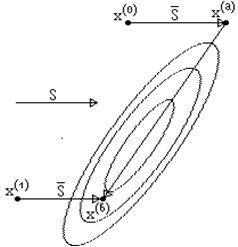

Критерій закінчення: якщо зміна по кожній змінній виявляється менше заданої точності за відповідною змінною або  $||x_n^{(k)}-x_0^{(k)}||\leqslant0,1\xi$.




## Реалізація методу

### Імпорт бібліотек

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def restriction(x, y, a=0.0, b=0.0):
    return x**2+y**2

### Оголошення констант

In [ ]:
_direction = [[1, 0], [0, 1], [1, 0]]
_eps = 0.001
global r
r = 10
rad = 1
counter = 0
start = [-1.2, 0]


### Оголошення функцій

In [ ]:
def restriction(x, y, a=0.0, b=0.0):
    return x**2+y**2

In [ ]:
def foo(x, xd, y, yd, nd, lam=0, dx=0, operation=1, foul_=True):
    global counter
    counter += 1
    px = x + (lam - operation * dx) * xd / nd
    py = y + (lam - operation * dx) * yd / nd
    if not foul_:
        return (10*(px-py)**2 + (px-1)**2)**4
    else:
        if restriction(px, py) > rad ** 0.5:
            return ((10 * (px - py) ** 2 + (px - 1) ** 2) ** 4) + foul(restriction(px, py))
        else:
            return (10 * (px - py) ** 2 + (px - 1) ** 2) ** 4

In [ ]:
def setup(start, direction, sb=True):
    x, y = start[0], start[1]
    xd, yd = direction[0], direction[1]
    nd = (xd ** 2 + yd ** 2) ** 0.5
    if sb:
        ns = (x ** 2 + y ** 2) ** 0.5
        dx = 0.1 * (ns / nd)
        return x, y, xd, yd, nd, ns, dx
    else:
        return x, y, xd, yd, nd

In [ ]:
def plot_(s):
    start, stop, n_values = -1.5, 2, 2000

    x_values = np.linspace(start, stop, n_values)
    y_values = np.linspace(start, stop, n_values)
    _x, _y = np.meshgrid(x_values, y_values)

    _z = (5 * (_x - 5) ** 2 + _x * _y + 3 * _y ** 2)

    plt.contour(_x, _y, _z)

    path = powell(s, "golden")

    x_coords = []
    for i in range(len(path)):
        x_coords.append(path[i][0])

    y_coords = []
    for i in range(len(path)):
        y_coords.append(path[i][1])

    axis = plt.gca()
    axis.set_xlim([-2, 2])
    axis.set_ylim([-2, 2])
    circle1 = plt.Circle((0, 0), rad**0.5, color='green')
    axis.add_artist(circle1)
    plt.scatter(x_coords, y_coords)
    plt.scatter([1], [1], color="red")
    plt.plot(x_coords, y_coords, color="black")
    plt.show()

In [ ]:
def plot_2(s):
    start, stop, n_values = -1.5, 2, 2000

    x_values = np.linspace(start, stop, n_values)
    y_values = np.linspace(start, stop, n_values)
    _x, _y = np.meshgrid(x_values, y_values)

    _z = (5 * (_x - 5) ** 2 + _x * _y + 3 * _y ** 2)

    plt.contour(_x, _y, _z)

    path = powell(s, "dsk")

    x_coords = []
    for i in range(len(path)):
        x_coords.append(path[i][0])

    y_coords = []
    for i in range(len(path)):
        y_coords.append(path[i][1])

    axis = plt.gca()
    axis.set_xlim([-2, 2])
    axis.set_ylim([-2, 2])
    circle1 = plt.Circle((0, 0), rad**0.5, color='green')
    axis.add_artist(circle1)
    plt.scatter(x_coords, y_coords)
    plt.scatter([1], [1], color="red")
    plt.plot(x_coords, y_coords, color="black")
    plt.show()

#### Метод Свена
Ефективність пошуку залежить від величини кроку. Якщо крок великий - отримуємо грубі оцінки координат граничних точок. Якщо крок невеликий - для обчислення граничних точок може знадобитися великий обсяг обчислень.
Пошук послідовності точок відбувається до тих пір, поки значення функції в цих точках зменшується. Коли буде знайдено точка, в якій значення функції перевищує значення функції в попередній точці, здійснюється повернення на половину останнього кроку і обчислюється значення функції в даній точці. Останні чотири точки розташовані один від одного на рівній відстані. Оцінюючи значення функції в цих точках, на основі правила виключення інтервалів визначається інтервал, що містить мінімум заданої функції.

In [ ]:
def sven(start, direction, _dx=0, lam=0, dsk_=False):
    if _dx == 0:
        x0, y0, xd, yd, normalized_direction, normalized_start, dx = setup(start, direction)
    else:
        dx = _dx
        x0, y0, xd, yd, normalized_direction = setup(start, direction, sb=False)
    values = [foo(x0, xd, y0, yd, normalized_direction, lam)]
    lambdas = [lam]
    if foo(x0, xd, y0, yd, normalized_direction, lam, dx) < \
            foo(x0, xd, y0, yd, normalized_direction, lam) < \
            foo(x0, xd, y0, yd, normalized_direction, lam, dx, -1):
        values.append(foo(x0, xd, y0, yd, normalized_direction, lam, dx))
        lambdas.append(lam - dx)
    elif foo(x0, xd, y0, yd, normalized_direction, lam, dx) > \
            foo(x0, xd, y0, yd, normalized_direction, lam) > \
            foo(x0, xd, y0, yd, normalized_direction, lam, dx, -1):
        values.append(foo(x0, xd, y0, yd, normalized_direction, lam, dx, -1))
        lambdas.append(lam + dx)
    elif foo(x0, xd, y0, yd, normalized_direction, lam, dx) > \
            foo(x0, xd, y0, yd, normalized_direction, lam, ) < \
            foo(x0, xd, y0, yd, normalized_direction, lam, dx, -1):
        if not dsk_:
            return [lam - dx, lam + dx]
        else:
            return lam-dx, lam, lam+dx
    operation = 1 if lambdas[1] > lambdas[0] else -1
    i = 1
    while values[i] < values[i - 1]:
        step = lambdas[i] + operation * dx * (2 ** i)
        lambdas.append(step)

        values.append(foo(x0, xd, y0, yd, normalized_direction, step, -operation))
        i += 1

    last = (lambdas[i], (lambdas[i] + lambdas[i - 1])/2, lambdas[i - 1], lambdas[i - 2])
    eval_lambdas = []
    for i in last:
        eval_lambdas.append(foo(x0, xd, y0, yd, normalized_direction, i))

    minimal = eval_lambdas.index(min(eval_lambdas))

    if not dsk_:
        return sorted([last[minimal - 1], last[minimal + 1]])
    else:
        return sorted((last[minimal - 1], last[minimal], last[minimal + 1]))

#### Метод золотого перетину
1. На кожному кроці алгоритму виключається 0,382 частина інтервалу.
2. Одна з двох точок послідовно одержуваних інтервалів завжди збігається з іншою точкою з пари точок попереднього інтервалу. Отже, на кожній ітерації потрібно тільки одне обчислення значень функції.
3. Якщо проведено n обчислень значення функції, то довжина отриманого інтервалу дорівнює:
$$L_n = (0.618)^{n-1}*L_0$$

In [ ]:
def golden_ratio(sven_, start, direction):
    x0, y0, xd, yd, nd = setup(start, direction, sb=False)
    long = sven_[1] - sven_[0]
    left = sven_[0] + 0.382 * long
    right = sven_[0] + 0.618 * long
    while long > _eps:
        if foo(x0, xd, y0, yd, nd, left) < \
                foo(x0, xd, y0, yd, nd, right):
            sven_[1] = right
            long = sven_[1] - sven_[0]
            left = sven_[0] + 0.382 * long
            right = sven_[0] + 0.618 * long
        elif foo(x0, xd, y0, yd, nd, left) > \
                foo(x0, xd, y0, yd, nd, right):
            sven_[0] = left
            long = sven_[1] - sven_[0]
            left = sven_[0] + 0.382 * long
            right = sven_[0] + 0.618 * long
    return (sven_[0] + sven_[1]) / 2

#### Метод ДСК-Пауелла
У методі ДСК за методом Свена визначається інтервал, що містить точку мінімуму, тобто перевіряються зростаючі за величиною кроки до тих пір, поки не буде пройдено мінімум. Після визначення інтервалу невизначеності за методом Свен з чотирьох рівновіддалених точок виключається та точка, яка знаходиться далі від точки x, що відповідає
найменшим значенням f(x).

Метод ДСК-Пауелла складається з:
1. етап: (Алгоритм ДСК) Визначення інтервалу, в якому знаходиться мінімум f (x), і одноразове оцінювання функції за допомогою квадратичної апроксимації.
2. етап: (Алгоритм Пауелла). Оцінювання функції за допомогою квадратичної апроксимації до тих пір, поки не буде досягнута необхідна точність (итерационная процедура).

In [ ]:
def dsk(sven_, start, direction):
    x0, y0, xd, yd, nd = setup(start, direction, sb=False)
    dx = abs(sven_[0] - sven_[1])
    f1 = foo(x0, xd, y0, yd, nd, sven_[0])
    f2 = foo(x0, xd, y0, yd, nd, sven_[1])
    f3 = foo(x0, xd, y0, yd, nd, sven_[2])

    x_dsk = sven_[1] + (dx*(f1-f3))/(2*(f1-2*f2+f3))
    f_dsk = foo(x0, xd, y0, yd, nd, x_dsk)
    if (sven_[1]-x_dsk) < _eps and (f2-f_dsk) < _eps:
        return x_dsk
    iteration = 0
    end = False
    while not end:
        iteration += 1
        dotes = sorted([sven_[0], sven_[1], sven_[2], x_dsk])
        dsk_index = dotes.index(x_dsk)
        if dsk_index == 0 or dsk_index == 1:
            dotes.remove(dotes[-1])
        elif dsk_index == 2 or dsk_index == 3:
            dotes.remove(dotes[0])
        f1 = foo(x0, xd, y0, yd, nd, dotes[0])
        f2 = foo(x0, xd, y0, yd, nd, dotes[1])
        f3 = foo(x0, xd, y0, yd, nd, dotes[2])
        a1 = (f2-f1)/(dotes[1]-dotes[0])
        a2 = (1/(dotes[2]-dotes[1]))*((f3-f1)/(dotes[2]-dotes[0])-a1)
        x_dsk = (dotes[0]+dotes[1])/2-a1/(2*a2)
        f_dsk = foo(x0, xd, y0, yd, nd, x_dsk)
        tmp_f = [f1, f2, f3, f_dsk]
        tmp_dotes = [dotes[0], dotes[1], dotes[2], x_dsk]
        index_f_min = tmp_f.index(min(tmp_f))
        x_min = tmp_dotes[index_f_min]
        if abs(min(tmp_f)-f_dsk) < _eps and abs(x_min - x_dsk) < _eps:
            end = True
        if iteration == 100:
            end = True
    return x_dsk

In [ ]:
def powell(start, name, dx=0):
    with open(f"{name}.txt", "w+") as file:
        global counter
        counter = 0

        i = 0
        position = [start]
        norm_new_x, prev_norm_x = 1, 0

        while abs(norm_new_x - prev_norm_x) >= _eps:

            global r
            r = r * 10
            file.write(f"--Iteration {i+1}--\n")
            sven_ = sven(position[i], _direction[i], dx)
            file.write(f" Direction = {_direction[i]}, point = {position[i]}\n")
            file.write(f"Lambda interval = {sven_}\n")
            if name == 'golden':
                lambda_optimal = golden_ratio(sven_, position[i], _direction[i])
                file.write(f"Golden ratio method for optimal lambda. Lambda Value = {lambda_optimal}\n")
            # else:
            elif name == 'dsk':
                lambda_optimal = dsk(sven(position[i], _direction[i], dx, dsk_=True), position[i], _direction[i])
                file.write(f"DSK method for optimal lambda. Lambda Value = {lambda_optimal}\n")
            new_x = [0, 0]
            new_x[0] = position[i][0] + lambda_optimal * _direction[i][0]
            new_x[1] = position[i][1] + lambda_optimal * _direction[i][1]
            position.append(new_x)
            file.write(f"New dote {new_x}\n\n\n")

            if (i+1) % 3 == 0:
                old = _direction[i]
                x = position[i+1][0] - position[i-1][0]
                y = position[i+1][1] - position[i-1][1]
                new_dir = [x, y]
                normalized_new = (x**2+y**2) ** 0.5
                new_dir[0] = new_dir[0]/normalized_new
                new_dir[1] = new_dir[1]/normalized_new
                _direction.append(new_dir)
                _direction.append(old)
                _direction.append(new_dir)

            i += 1
            norm_new_x = (position[i][0]**2 + position[i][1]**2) ** 0.5
            prev_norm_x = (position[i-1][0]**2 + position[i-1][1]**2) ** 0.5
        file.write(f"\nEnd of calculation via reaching criteria of ending")
        file.close()
        position[-1][0] = round(position[-1][0], 4)
        position[-1][1] = round(position[-1][1], 4)
        x0, y0, xd, yd, nd = setup(position[-1], _direction[-1], sb=False)
        f = foo(x0, xd, y0, yd, nd)

        r = 0
        return position

### Виконання розрахунків та відображення результатів

Знаходження лямбди методом золотого перетину

In [ ]:
powell(start,"golden")

[[-1.2, 0],
 [-0.6004603216676057, 0.0],
 [-0.6004603216676057, -0.11960412136336515],
 [-0.47850659561650055, -0.11960412136336515],
 [-0.4083646521910526, -0.18839468468411208],
 [-0.3187847354065322, -0.18839468468411208],
 [-0.26625827455252243, -0.2399091517053032],
 [-0.18296010783447808, -0.2701052676969258],
 [-0.19647958767334311, -0.25684625905671765],
 [-0.1775377387108078, -0.26371279995316466],
 [0.04841520561449436, 0.002664658914789897],
 [0.05712140772080343, -0.0004913948017160677],
 [0.06430585520786852, 0.007978399078107948],
 [0.07625430689252355, 0.011973891347517132],
 [0.08596235806177475, 0.023418778727706185],
 [0.10239088404523464, 0.028912381605893406],
 [0.11994035368466535, 0.04028577295665538],
 [0.14352605544336752, 0.04817269349938224],
 [0.16866522690254018, 0.06446478899363396],
 [0.20067007100291673, 0.08034673157568499],
 [0.23656315831408925, 0.10360818261462798],
 [0.26288456905229857, 0.11666980330903728],
 [0.30979135826248116, 0.1440556815638185

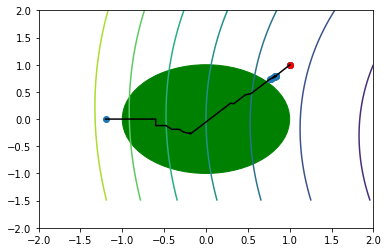

In [ ]:
plot_(start)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Знаходження лямбди методом ДСК-Пауелла

In [ ]:
powell(start,"dsk")

[[-1.2, 0],
 [-0.3219738459082858, 0.0],
 [-0.3219738459082858, -0.18175608043612707],
 [-0.13973667005676244, -0.18175608043612707],
 [-0.13209675174415833, -0.18924880531346278],
 [-0.0811428238862183, -0.18924880531346278],
 [-0.10750028432580455, -0.1633991572598615],
 [-0.08982694691021498, -0.1698058546409291],
 [-0.10210147988318824, -0.15776780726906842],
 [-0.08453731711836271, -0.16413492814386096],
 [0.6902855925336748, 0.7493090562312186],
 [0.7528617091084693, 0.7266248154028011],
 [0.9560681093543087, 0.9661862191491554],
 [1.0111463256935351, 0.9846040521374116],
 [1.0532759674750143, 1.0342709726295423],
 [1.0197555595911276, 1.0230619445393576],
 [1.012731420134127, 1.0185097678304216],
 [1.031151469031066, 1.0246693243078835],
 [1.0030643182647816, 1.0064667139637473],
 [1.0186422414723186, 1.0141970338226336],
 [0.9954232624163255, 0.9991493690786453],
 [1.020402786104393, 1.01154509766575],
 [0.9931937329795281, 0.9956594694048486],
 [1.014120717125712, 1.0060441836

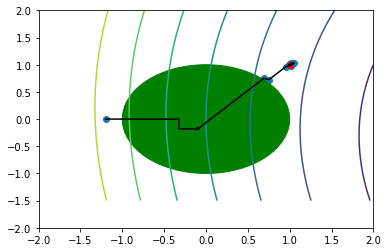

In [ ]:
plot_2(start)

Поміняємо значення епсилон


In [ ]:
_eps = 0.0001

Знаходження лямбди методом золотого перетину

In [ ]:
powell(start,"golden")

[[-1.2, 0],
 [-0.6000414957667033, 0.0],
 [-0.6000414957667033, -0.11996434414049462],
 [-0.47770311254765657, -0.11996434414049462],
 [-0.4073995631309922, -0.18891339989285777],
 [-0.3176187234803931, -0.18891339989285777],
 [-0.26488135650570077, -0.2406347096409683],
 [-0.18333311440238464, -0.2701964668138453],
 [-0.19667489209324376, -0.25711173664765213],
 [-0.17761074801616986, -0.2640226103020615],
 [0.2957846914937863, 0.29406648472116176],
 [0.33060761046575765, 0.281442954793981],
 [0.4710110047132593, 0.4469654687305121],
 [0.5389286062043687, 0.4696767169220284],
 [0.7701171200788838, 0.7422264242482193],
 [0.7782463300564768, 0.744944784457483],
 [0.8249482451757759, 0.7752111781659533],
 [0.7962375014150674, 0.7656104735916341],
 [0.8391168572365537, 0.793399558085139],
 [0.8195015686175514, 0.7836657538334979],
 [0.843798997567532, 0.7994123361487016],
 [0.8247605718746052, 0.7899647918094947],
 [0.8359104344044478, 0.7964744843921951],
 [0.8261447878506629, 0.79162842

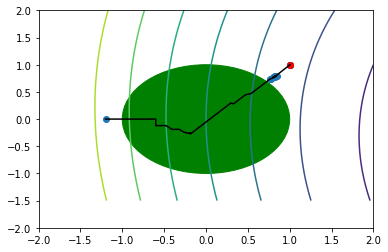

In [ ]:
plot_(start)

Знаходження лямбди методом ДСК-Пауелла

In [ ]:
powell(start,"dsk")

[[-1.2, 0],
 [-0.3219738459082858, 0.0],
 [-0.3219738459082858, -0.18175608043612707],
 [-0.13973667005676244, -0.18175608043612707],
 [-0.13209675174415833, -0.18924880531346278],
 [-0.0811428238862183, -0.18924880531346278],
 [-0.10750028432580455, -0.1633991572598615],
 [-0.0898188975484509, -0.16980877258583787],
 [-0.10211601624586406, -0.15774857463429048],
 [-0.08452740799430336, -0.16412455715372673],
 [0.6902433752513722, 0.7492579750472813],
 [0.7528132236831353, 0.7265760064606368],
 [0.9560066879129459, 0.9661221598499402],
 [1.0110908394748734, 0.9845419775419092],
 [1.0532407811894433, 1.0342328297628698],
 [1.0197217608798501, 1.0230242656694029],
 [1.0127141493122012, 1.0184828002900774],
 [1.0311021719389148, 1.024631647370332],
 [1.003028537399268, 1.0064377965692641],
 [1.0186812635414793, 1.0142052363063083],
 [0.9954076999848643, 0.9991221966535613],
 [1.0203461648443264, 1.0114975503887733],
 [0.993154396456145, 0.9956220135816347],
 [1.0141304573364391, 1.0060310

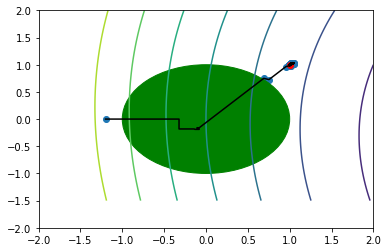

In [ ]:
plot_2(start)

Знову поміняємо значення епсилон


In [ ]:
_eps = 0.00001

Знаходження лямбди методом золотого перетину

In [ ]:
powell(start,"golden")

[[-1.2, 0],
 [-0.6000037406421975, 0.0],
 [-0.6000037406421975, -0.11999678604643785],
 [-0.47763070531640056, -0.11999678604643785],
 [-0.4073126174569492, -0.18896010013867987],
 [-0.3175155248395794, -0.18896010013867987],
 [-0.2647589568935955, -0.24070024092520975],
 [-0.18335619999809497, -0.2702092587836054],
 [-0.19670297207355797, -0.2571196304564323],
 [-0.17761113026031267, -0.26404054471662075],
 [0.2958326709159972, 0.29410556420313905],
 [0.3306236116748683, 0.28149362658188803],
 [0.47106470729237865, 0.4470605869192782],
 [0.5390475469476306, 0.46979365037082826],
 [0.7703134526444584, 0.7424345954413485],
 [0.7784380736391646, 0.7451514211216095],
 [0.8250835988106332, 0.7753812698541858],
 [0.7963734960806149, 0.7657807796367754],
 [0.8392437591957129, 0.7935639713648397],
 [0.8196360480297299, 0.7838339273150416],
 [0.8439230770235361, 0.7995737696674982],
 [0.8248872326560008, 0.7901275062738109],
 [0.8360365979694052, 0.7966369085635906],
 [0.8262802861090462, 0.79

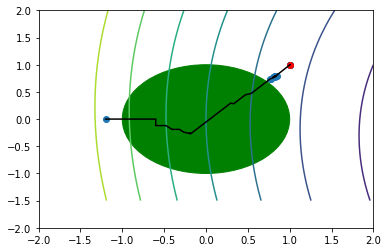

In [ ]:
plot_(start)

Знаходження лямбди методом ДСК-Пауелла

In [ ]:
powell(start,"dsk")

[[-1.2, 0],
 [-0.3219738459082858, 0.0],
 [-0.3219738459082858, -0.18175608043612707],
 [-0.13973667005676244, -0.18175608043612707],
 [-0.13209675174415833, -0.18924880531346278],
 [-0.0811428238862183, -0.18924880531346278],
 [-0.10750028432580455, -0.1633991572598615],
 [-0.0898188975484509, -0.16980877258583787],
 [-0.10211601624586406, -0.15774857463429048],
 [-0.08452655744493137, -0.16412486548329153],
 [0.69024335474972, 0.7492566398297551],
 [0.7528120243482849, 0.7265750985776533],
 [0.9560052094848213, 0.9661209229420025],
 [1.0110899245279492, 0.984540929058785],
 [1.0532402083599033, 1.0342321846042506],
 [1.0197212056153346, 1.023023626384425],
 [1.0127138057140697, 1.0184822981810182],
 [1.0311013467825711, 1.0246309842310268],
 [1.0030279228386276, 1.0064372699119952],
 [1.018681773185081, 1.0142052675191908],
 [0.9954074010884911, 0.9991217038710327],
 [1.0203452173391874, 1.0114967357434934],
 [0.9931537251386569, 0.9956213601846838],
 [1.014130551348659, 1.0060308078

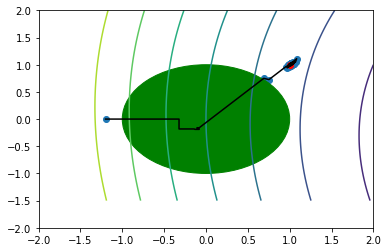

In [ ]:
plot_2(start)

## Висновки

Отже, у цій роботі ми дослідили збіжність метода спряжених напрямів Пауелла при мінімізації  степеневої функції

Було виявлено наступне:

- Використання методу ДСК-Пауелла потребує більшої кількості викликів функції, що, в свою чергу, збільшує час роботи програми, в даному випадку 34 ітерації виконується при використанні цього метода, в той час як використання методу золотого перетину потребує лише 27 ітерацій коли епсилон дорівнює 0.001.
- Коли епсилон дорівнює 0.0001, то метод ДСК-Пауелла потребує 61 ітерацію, а метод золотого перетину 28 ітерацій.
- Коли епсилон дорівнює 0.00001, то метод ДСК-Пауелла потребує 148 ітерацій, а метод золотого перетину все одно 28 ітерацій.

- При обчисленні критерія закінчення можна користуватися  варіантом, з обчисленням різниці функцій та значень функцій по модулю та порівнянням її з Ԑ. Оскільки цей критерій, по-перше, задовольняє достатню точніть при обчислененнях, по-друге - не є складним для використання.


## Список використаної літератури

1. Фихтенгольц Г. М. Курс дифференциального и интегрального исчисления, в трёх томах. — изд. 6-е. — М.: Наука, 1966.
2. Математическая энциклопедия (в 5 томах). — М.: Советская Энциклопедия, 1982. — Т. 5. — С. 208—209.
3. Jeffery J. Leader. Numerical Analysis and Scientific Computation. — Addison Wesley, 2004.
4. Т. С. Ладогубець. Методи оптимізації- електронний конспект – Київ: НТУУ «КПІ», 2016. 